<a href="https://colab.research.google.com/github/byshadowoz/Movies_Data_Visualization/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#unzip archive.zip

In [2]:
#!pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('movie_dataset.csv', index_col=0)

In [5]:
df.info() #23 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1034999 entries, 27205 to 1286779
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1034987 non-null  object 
 1   vote_average          1034999 non-null  float64
 2   vote_count            1034999 non-null  int64  
 3   status                1034999 non-null  object 
 4   release_date          903322 non-null   object 
 5   revenue               1034999 non-null  int64  
 6   runtime               1034999 non-null  int64  
 7   adult                 1034999 non-null  bool   
 8   backdrop_path         287519 non-null   object 
 9   budget                1034999 non-null  int64  
 10  homepage              111939 non-null   object 
 11  imdb_id               579730 non-null   object 
 12  original_language     1034999 non-null  object 
 13  original_title        1034987 non-null  object 
 14  overview              843934 non-nu

In [6]:
df2 = df.copy()

In [7]:
df = df.drop(columns=['backdrop_path','poster_path','imdb_id','homepage'])

In [8]:

df.info() #18 columns

<class 'pandas.core.frame.DataFrame'>
Index: 1034999 entries, 27205 to 1286779
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1034987 non-null  object 
 1   vote_average          1034999 non-null  float64
 2   vote_count            1034999 non-null  int64  
 3   status                1034999 non-null  object 
 4   release_date          903322 non-null   object 
 5   revenue               1034999 non-null  int64  
 6   runtime               1034999 non-null  int64  
 7   adult                 1034999 non-null  bool   
 8   budget                1034999 non-null  int64  
 9   original_language     1034999 non-null  object 
 10  original_title        1034987 non-null  object 
 11  overview              843934 non-null   object 
 12  popularity            1034999 non-null  float64
 13  tagline               147785 non-null   object 
 14  genres                645131 non-nu

In [9]:
mask = df['budget'] < 100000
df = df.drop(df[mask].index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20253 entries, 27205 to 683007
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 20253 non-null  object 
 1   vote_average          20253 non-null  float64
 2   vote_count            20253 non-null  int64  
 3   status                20253 non-null  object 
 4   release_date          19431 non-null  object 
 5   revenue               20253 non-null  int64  
 6   runtime               20253 non-null  int64  
 7   adult                 20253 non-null  bool   
 8   budget                20253 non-null  int64  
 9   original_language     20253 non-null  object 
 10  original_title        20253 non-null  object 
 11  overview              19733 non-null  object 
 12  popularity            20253 non-null  float64
 13  tagline               12789 non-null  object 
 14  genres                19497 non-null  object 
 15  production_companie

In [11]:
mask2 = df.isnull().any(axis=1)
df = df.drop(df[mask2].index)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10337 entries, 27205 to 694772
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 10337 non-null  object 
 1   vote_average          10337 non-null  float64
 2   vote_count            10337 non-null  int64  
 3   status                10337 non-null  object 
 4   release_date          10337 non-null  object 
 5   revenue               10337 non-null  int64  
 6   runtime               10337 non-null  int64  
 7   adult                 10337 non-null  bool   
 8   budget                10337 non-null  int64  
 9   original_language     10337 non-null  object 
 10  original_title        10337 non-null  object 
 11  overview              10337 non-null  object 
 12  popularity            10337 non-null  float64
 13  tagline               10337 non-null  object 
 14  genres                10337 non-null  object 
 15  production_companie

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
df['production_companies'].unique()

array(['Legendary Pictures, Syncopy, Warner Bros. Pictures',
       'Legendary Pictures, Syncopy, Lynda Obst Productions',
       'DC Comics, Legendary Pictures, Syncopy, Isobel Griffiths, Warner Bros. Pictures',
       ..., 'Making Movies', 'AFP', 'Found Object, WETA'], dtype=object)

In [15]:
mask = df[['production_companies', 'title', 'revenue', 'release_date','budget']]

In [16]:
df3 = pd.DataFrame(mask)

In [17]:
df3

,production_companies,title,revenue,release_date,budget
id,,,,,
27205,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Inception,825532764,2010-07-15,160000000
157336,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Interstellar,701729206,2014-11-05,165000000
155,"DC Comics, Legendary Pictures, Syncopy, Isobel...",The Dark Knight,1004558444,2008-07-16,185000000
19995,"Dune Entertainment, Lightstorm Entertainment, ...",Avatar,2923706026,2009-12-15,237000000
24428,Marvel Studios,The Avengers,1518815515,2012-04-25,220000000
...,...,...,...,...,...
716283,Sunrayz International Films,Crack House of the Dead,0,2021-06-18,175000
674929,"Firma Films, Kan, United King Films",Douze Points,0,2019-05-19,1300000
674599,Making Movies,Siblings,0,2023-10-27,1427000


In [18]:
mask2 = df3['revenue'] <= 0

In [19]:
df3 = df3.drop(df3[mask2].index)

In [20]:
df3

,production_companies,title,revenue,release_date,budget
id,,,,,
27205,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Inception,825532764,2010-07-15,160000000
157336,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Interstellar,701729206,2014-11-05,165000000
155,"DC Comics, Legendary Pictures, Syncopy, Isobel...",The Dark Knight,1004558444,2008-07-16,185000000
19995,"Dune Entertainment, Lightstorm Entertainment, ...",Avatar,2923706026,2009-12-15,237000000
24428,Marvel Studios,The Avengers,1518815515,2012-04-25,220000000
...,...,...,...,...,...
784837,"Canal Sur, Teyso Media Ficción",La banda en la isla de la magia,32000,2008-12-19,731000
773862,Gabinete Films,Your Parents Will Come Back,20698,2015-04-04,293000
761273,88 Rising,Joji Presents: THE EXTRAVAGANZA,1000000,2020-10-23,100000


# **What is the largest budget in a movie in each year?**

In [24]:
result = df3.groupby(df['release_date'].dt.year)['budget'].idxmax()
year = df3.loc[result]

In [25]:
year

,production_companies,title,revenue,release_date,budget
id,,,,,
618,Epoch Film Co.,The Birth of a Nation,11000000,1915-02-08,100000
3059,"Triangle Film Corporation, Wark Producing Corp.",Intolerance: Love's Struggle Throughout the Ages,1750000,1916-09-04,385907
54242,Mabel Normand Feature Film Company,Mickey,8000000,1918-08-01,250000
278093,"Paramount, Mayflower Photoplay Company",The Miracle Man,3600000,1919-08-26,120000
563505,Fox Film Corporation,Over the Hill to the Poorhouse,3000000,1920-09-17,100000
...,...,...,...,...,...
299534,Marvel Studios,Avengers: Endgame,2800000000,2019-04-24,356000000
577922,"Warner Bros. Pictures, Syncopy",Tenet,365304105,2020-08-22,205000000
370172,"Eon Productions, Metro-Goldwyn-Mayer, Universa...",No Time to Die,774153007,2021-09-29,250000000


from matplotlib import pyplot as plt
year['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year['budget'].plot(kind='hist', bins=20, title='budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year.plot(kind='scatter', x='revenue', y='budget', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['release_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'release_date'}, axis=1)
              .sort_values('release_date', ascending=True))
  xs = counted['release_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('revenue')

from matplotlib import pyplot as plt
year['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
year['budget'].plot(kind='line', figsize=(8, 4), title='budget')
plt.gca().spines[['top', 'right']].set_visible(False)

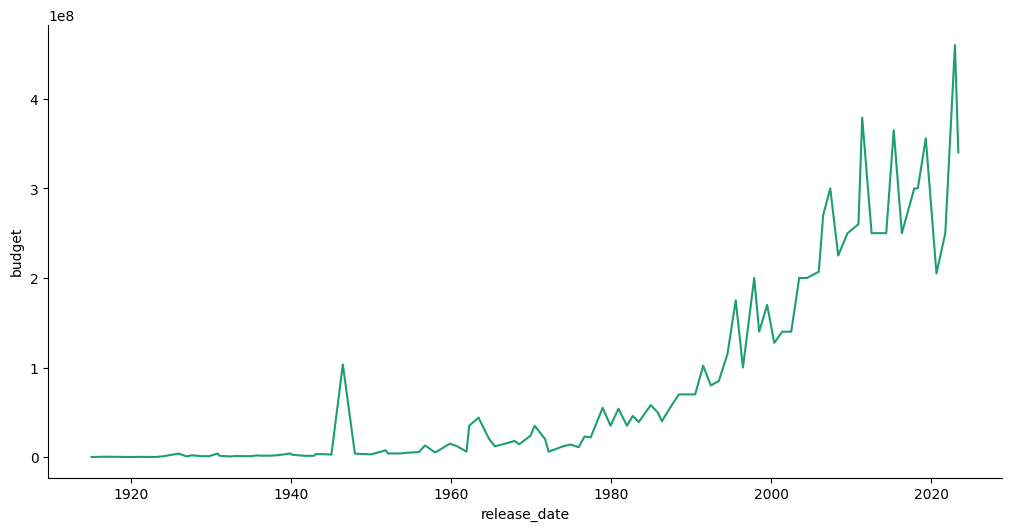

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['budget']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('budget')

In [30]:
df3['profit'] = df['revenue'] - df['budget']
df3['box_Office_Success'] = df3['revenue'] >= 2.5 * df3['budget']

# **What is the largest revenue and profit in a movie in each year?, it is a Box Oficce success?**

In [ ]:
result = df3.groupby(df['release_date'].dt.year)['revenue'].idxmax()
year = df3.loc[result]

In [ ]:
year

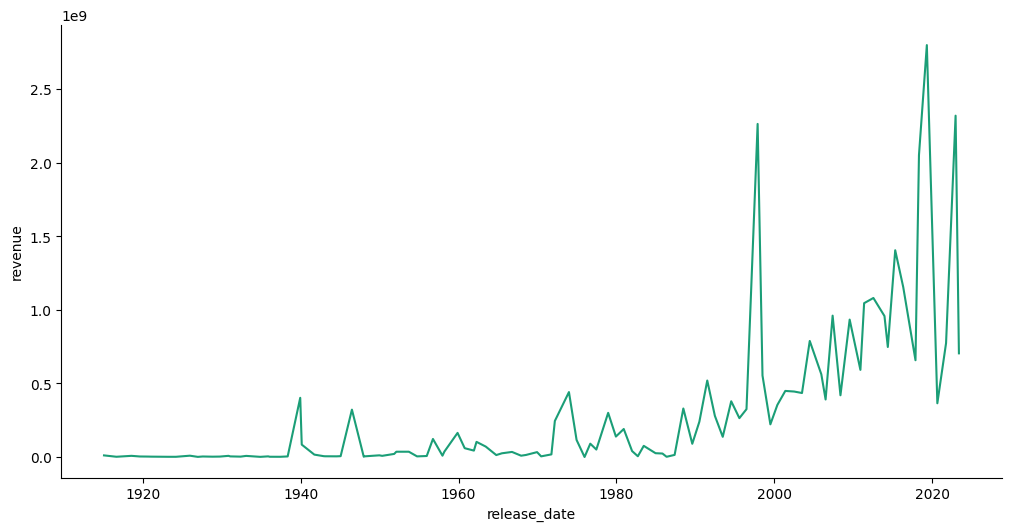

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['release_date']
  ys = series['revenue']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('release_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('release_date')
_ = plt.ylabel('revenue')

In [31]:
df3

,production_companies,title,revenue,release_date,budget,profit,Box office success,box_Office_Success
id,,,,,,,,
27205,"Legendary Pictures, Syncopy, Warner Bros. Pict...",Inception,825532764,2010-07-15,160000000,665532764,True,True
157336,"Legendary Pictures, Syncopy, Lynda Obst Produc...",Interstellar,701729206,2014-11-05,165000000,536729206,True,True
155,"DC Comics, Legendary Pictures, Syncopy, Isobel...",The Dark Knight,1004558444,2008-07-16,185000000,819558444,True,True
19995,"Dune Entertainment, Lightstorm Entertainment, ...",Avatar,2923706026,2009-12-15,237000000,2686706026,True,True
24428,Marvel Studios,The Avengers,1518815515,2012-04-25,220000000,1298815515,True,True
...,...,...,...,...,...,...,...,...
784837,"Canal Sur, Teyso Media Ficción",La banda en la isla de la magia,32000,2008-12-19,731000,-699000,False,False
773862,Gabinete Films,Your Parents Will Come Back,20698,2015-04-04,293000,-272302,False,False
761273,88 Rising,Joji Presents: THE EXTRAVAGANZA,1000000,2020-10-23,100000,900000,True,True


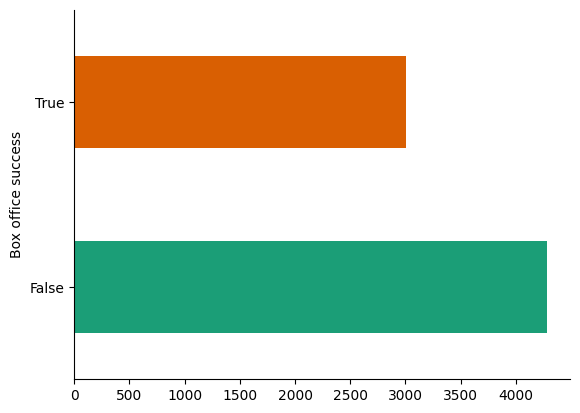

In [32]:
import seaborn as sns
df3.groupby('Box office success').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)